## Challenge 2

For the same data from Challenge 1, make predictions for every day of the last month.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rcParams['figure.figsize'] = (20, 5)

Load

In [3]:
df_dbilling = pd.read_csv('data/data_2__.csv')
df_dbilling.describe()

,index,valor
count,1542.000000,1542.000000
mean,770.500000,10956.127516
std,445.281372,5286.030580
min,0.000000,0.440000
25%,385.250000,7531.375000
50%,770.500000,10578.795000
75%,1155.750000,14732.757500
max,1541.000000,27351.500000


In [4]:
df_dbilling.head()

,index,data,valor
0,0,2014-07-18,1.50
1,1,2014-08-05,83.20
2,2,2014-08-08,22.50
3,3,2014-08-11,15.91
4,4,2014-08-12,0.44


Clean

In [5]:
df_dbilling = df_dbilling.sort_values('data', ascending=True)

In [6]:
df_dbilling = df_dbilling.drop(['index'], axis=1)

Datatime parser

In [7]:
#df_dbilling['data'] = pd.to_datetime(df_dbilling['data'])
df_dbilling = df_dbilling.drop(['data'], axis=1)

In [8]:
df_dbilling['day'] = np.arange(len(df_dbilling))

In [9]:
x = df_dbilling['day']
y = df_dbilling['valor']

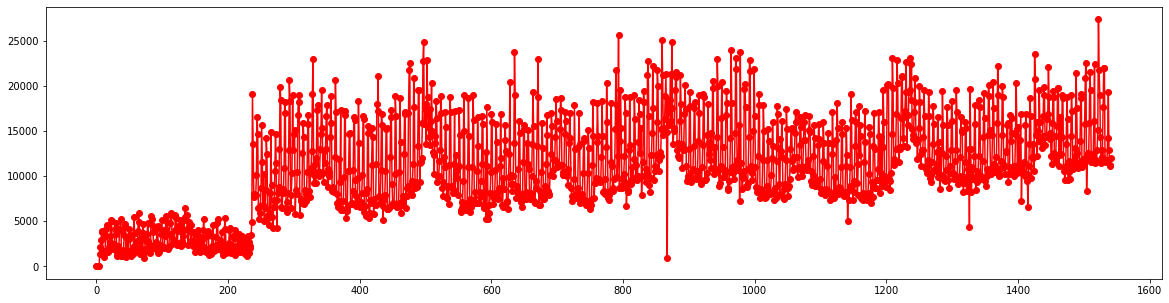

In [10]:
plt.plot(x, y, '-o', color='red')

In [11]:
df_dbilling.head()

,valor,day
0,1.50,0
1,83.20,1
2,22.50,2
3,15.91,3
4,0.44,4


In [12]:
df_dbilling.columns

Index(['valor', 'day'], dtype='object')

## Predicting Model

In [13]:
from sklearn import metrics

In [14]:
last_day = df_dbilling['valor'].values[-1]

#remove last day information
df_dbilling = df_dbilling.drop(df_dbilling.index[-1])

expected_value = [[last_day]]

In [15]:
last_day

12025.8

In [16]:
df_dbilling.tail()

,valor,day
1536,14266.50,1536
1537,19315.50,1537
1538,12903.71,1538
1539,11071.90,1539
1540,11205.80,1540


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge

estimators = {
    'Linear Regression' : LinearRegression(),
    'BayesianRidge'     : BayesianRidge()
}

In [18]:
#df_dbilling = df_dbilling.append({'day': pred_day_id, 'valor' : pred_day}, ignore_index=True)

In [19]:
def future_predicting(df_dbilling, estimator, qtd_days):
    for i in range(qtd_days):
        estimator = LinearRegression()

        X = pd.DataFrame(df_dbilling['day'])
        y = pd.DataFrame(df_dbilling['valor'])

        estimator.fit(X,y)

        pred_day_id = (df_dbilling['day'].values[-1]+1)
        pred_day = (estimator.predict([[pred_day_id]]))

        #print('last day:', last_day)
        #print('pred day:', pred_day)

        y_test = pred_day
        y_pred = expected_value

        """
        print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
        print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
        print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
        print()
        """

        df_dbilling = df_dbilling.append({'day': pred_day_id, 'valor' : pred_day[0][0]}, ignore_index=True)

In [20]:
qtd_days = 30
estimator = BayesianRidge()
future_predicting(df_dbilling, estimator, 30)

In [21]:
df_dbilling.tail(qtd_days)

,valor,day
1511,11574.30,1511
1512,11745.41,1512
1513,12396.01,1513
1514,12038.50,1514
1515,16057.87,1515
1516,22377.21,1516
1517,11441.12,1517
1518,11824.10,1518
1519,11556.20,1519
1520,12886.30,1520


In [22]:
"""
Y_pred = model.predict(X) 
plt.plot(X, y, 'o', color='black')
plt.plot(X, Y_pred, '--', color='orange')
"""

"\nY_pred = model.predict(X) \nplt.plot(X, y, 'o', color='black')\nplt.plot(X, Y_pred, '--', color='orange')\n"